# Nelinearna optimizacija

Metoda linearnega programiranja ni primerna za reševanje optimizacijskih problemov, kadar kriterijska funkcija ni linearna, npr. če vsebuje logaritemsko funkcijo neke spremenljivke. V tem primeru uporabimo metode nelinearne optimizacije. 

## Knjižnice
Uporabili bomo knjižnico `optimize` , del `scipy` paketa.

https://docs.scipy.org/doc/scipy/reference/optimize.html

In [2]:
%matplotlib inline
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

## Eno-dimenzijski problem (ena spremenljivka)

Definirati moramo funkcijo in njen prvi odvod, ki ga potrebuje Newtonova metoda. Narišemo graf funkcije, da vidimo njen potek. 

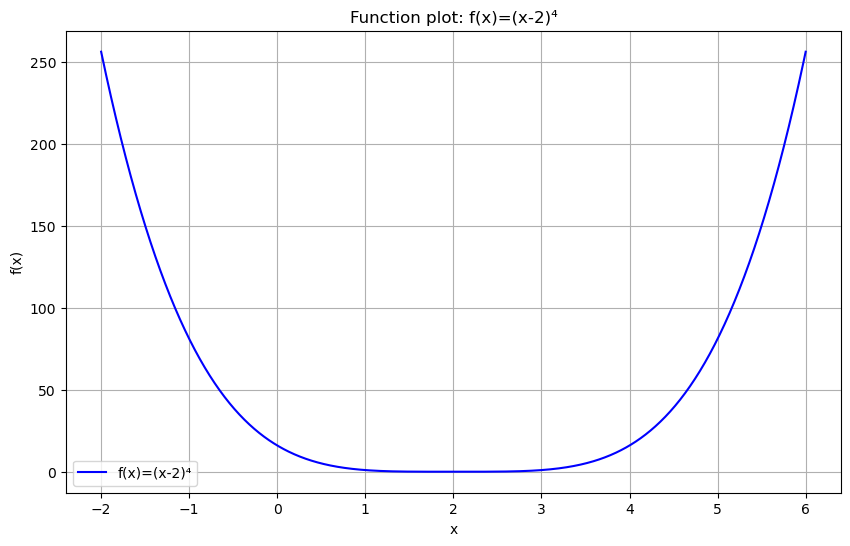

Optimization Results:
x minimum: 1.9948165018
f(x) minimum: 7.2192457169e-10

Full optimization result:
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 7.219245716889364e-10
        x: [ 1.995e+00]
      nit: 20
      jac: [-5.571e-07]
 hess_inv: [[ 1.300e+03]]
     nfev: 42
     njev: 21

Testing different tolerances:
Tolerance | x minimum | f(x) minimum | Iterations
------------------------------------------------------------
1e-01 | 1.7341058500 |    5.00e-03 | 6
1e-03 | 1.9508401049 |    5.84e-06 | 12
1e-06 | 1.9948165018 |    7.22e-10 | 20
1e-10 | 1.9997648860 |    3.06e-15 | 31


In [4]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def f1(x):
    return (x-2)**4

def f1_der(x):
    return 4*(x-2)**3

# Plot the function
num_points = 1000
start = -2
end = 6
x = np.linspace(start, end, num_points)
y = f1(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='f(x)=(x-2)⁴')
plt.grid(True)
plt.title('Function plot: f(x)=(x-2)⁴')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Optimization using BFGS
x0 = 0  # Starting point
result = minimize(f1, x0, method='BFGS', tol=1e-6)

print("Optimization Results:")
print(f"x minimum: {result.x[0]:.10f}")
print(f"f(x) minimum: {result.fun:.10e}")
print("\nFull optimization result:")
print(result)

# Test different tolerances
tolerances = [1e-1, 1e-3, 1e-6, 1e-10]

print("\nTesting different tolerances:")
print("Tolerance | x minimum | f(x) minimum | Iterations")
print("-" * 60)
for tol in tolerances:
    res = minimize(f1, x0, method='BFGS', tol=tol)
    print(f"{tol:1.0e} | {res.x[0]:9.10f} | {res.fun:11.2e} | {res.nit}")

In [5]:
import scipy.optimize as spo
from scipy.optimize import OptimizeResult

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

#starting estimate
x_start = -2.0

opt_options = {'disp' : True}
tolerance = 1E-1
# Run minimize
res = spo.minimize(f1, x_start, args=(), method='BFGS', jac=None, hess=None, hessp=None, bounds=None, constraints=(), 
                   tol=tolerance, callback=None, options=opt_options)

print(res)


Optimization terminated successfully.
         Current function value: 0.003243
         Iterations: 10
         Function evaluations: 22
         Gradient evaluations: 11
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.003243062811888848
        x: [ 1.761e+00]
      nit: 10
      jac: [-5.436e-02]
 hess_inv: [[ 6.132e-01]]
     nfev: 22
     njev: 11


/tmp/ipykernel_14168/3038713771.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_list.append(float(xk))
/tmp/ipykernel_14168/3038713771.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f_list.append(float(function(xk)))


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 36
         Gradient evaluations: 18
Optimization Results:
x minimum: 1.9879498387
f(x) minimum: 2.1084894911e-08
Number of iterations: 17


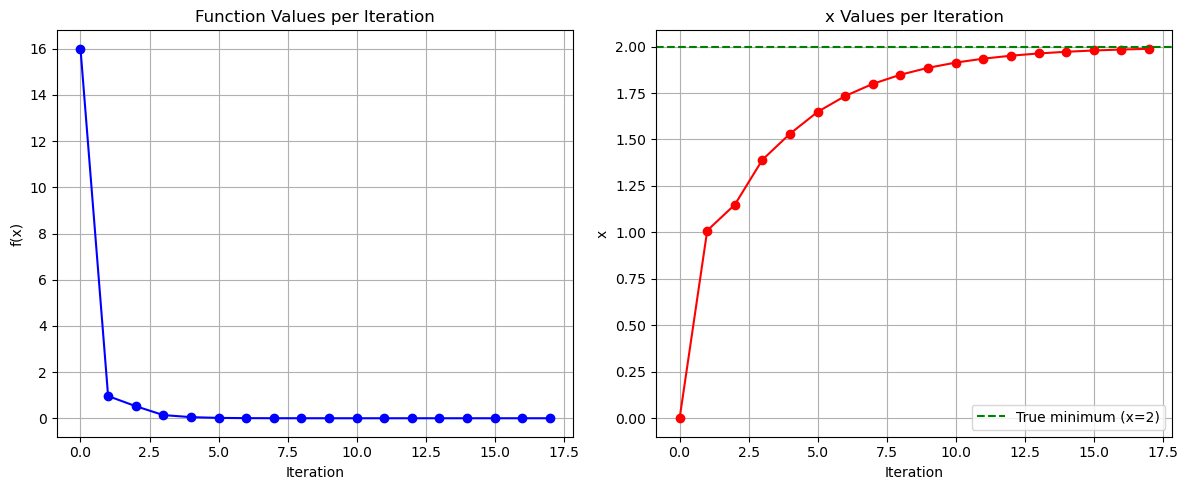

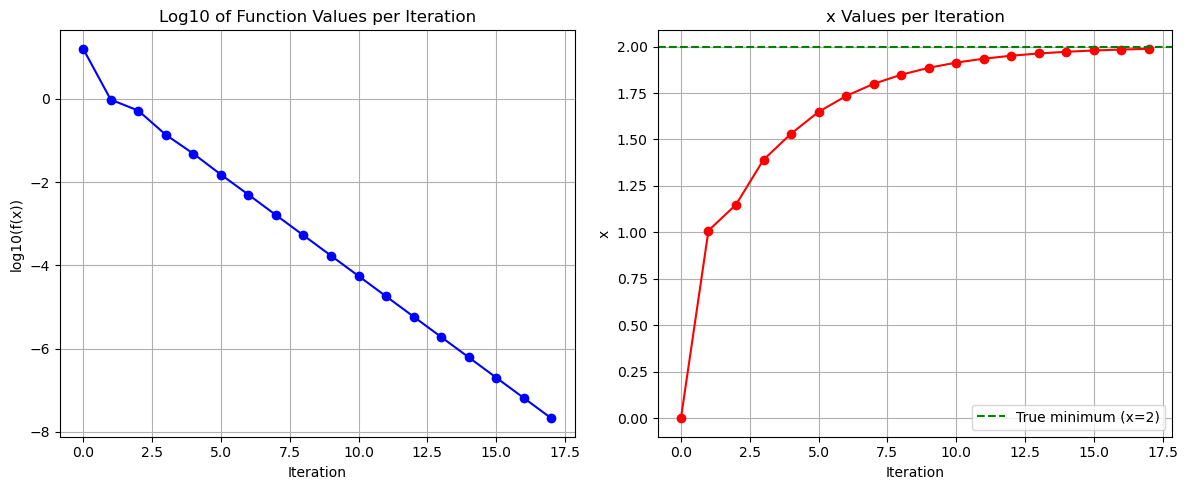

In [7]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def minimize_function_x(x0, function, opt_method='CG', opt_options={'disp': True}, opt_tol=None, jacobian=None):
    x_list = [float(x0)]  # Convert to float
    f_list = [float(function(x0))]  # Convert to float
    
    def callback(xk):
        # Ensure we're handling scalar values
        x_list.append(float(xk))
        f_list.append(float(function(xk)))
    
    result = minimize(function, x0, method=opt_method, callback=callback,
                     options=opt_options, tol=opt_tol, jac=jacobian)
    
    return result, np.array(x_list), np.array(f_list)

def f1(x):
    return (x-2)**4

# Run optimization with BFGS
x0 = 0
result, x_history, f_history = minimize_function_x(x0, f1, opt_method='BFGS')

print("Optimization Results:")
print(f"x minimum: {result.x[0]:.10f}")
print(f"f(x) minimum: {result.fun:.10e}")
print(f"Number of iterations: {len(x_history)-1}")

# Visualization 1: Regular scale
plt.figure(figsize=(12, 5))

# First subplot: function values
plt.subplot(121)
plt.plot(range(len(f_history)), f_history, 'bo-')
plt.grid(True)
plt.title('Function Values per Iteration')
plt.xlabel('Iteration')
plt.ylabel('f(x)')

# Second subplot: x values
plt.subplot(122)
plt.plot(range(len(x_history)), x_history, 'ro-')
plt.grid(True)
plt.title('x Values per Iteration')
plt.xlabel('Iteration')
plt.ylabel('x')
plt.axhline(y=2, color='g', linestyle='--', label='True minimum (x=2)')
plt.legend()

plt.tight_layout()
plt.show()

# Visualization 2: Logarithmic scale for function values
plt.figure(figsize=(12, 5))

# First subplot: log of function values
plt.subplot(121)
plt.plot(range(len(f_history)), np.log10(f_history), 'bo-')
plt.grid(True)
plt.title('Log10 of Function Values per Iteration')
plt.xlabel('Iteration')
plt.ylabel('log10(f(x))')

# Second subplot: x values (same as before)
plt.subplot(122)
plt.plot(range(len(x_history)), x_history, 'ro-')
plt.grid(True)
plt.title('x Values per Iteration')
plt.xlabel('Iteration')
plt.ylabel('x')
plt.axhline(y=2, color='g', linestyle='--', label='True minimum (x=2)')
plt.legend()

plt.tight_layout()
plt.show()

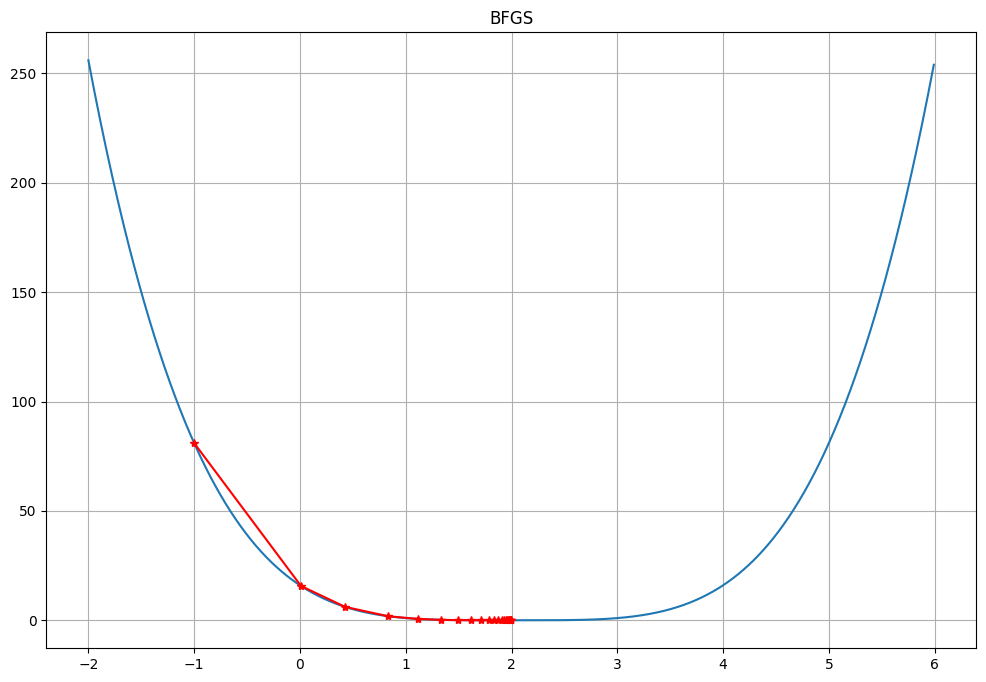

In [60]:
# 2.2 Vizualizacija

fig = plt.figure(figsize=[12,8])

plt.plot(point,  data)
plt.plot(opt_res[1], opt_res[2], 'r*-')

plt.grid()
plt.title(opt_method)
#plt.xlim([-1,1])
#plt.ylim([0,100])
plt.show()


Optimization Methods Comparison:
--------------------------------------------------------------------------------
Method       Iterations   Func Evals        Result x      Error x Comment   
--------------------------------------------------------------------------------
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 33
         Hessian evaluations: 0
Newton-CG            16           17    1.9954399514     4.56e-03 Success   


/tmp/ipykernel_14168/360727205.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_list.append(float(xk))
/tmp/ipykernel_14168/360727205.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f_list.append(float(function(xk)))
/tmp/ipykernel_14168/360727205.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_list.append(float(xk))
/tmp/ipykernel_14168/360727205.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will e

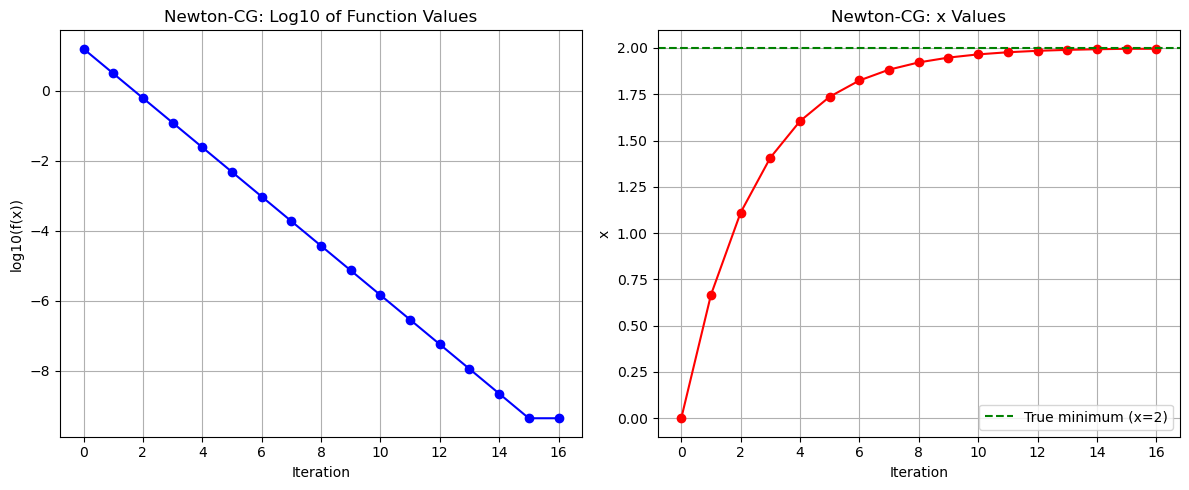

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 42
         Gradient evaluations: 21
BFGS                 20           42    1.9948165018     5.18e-03 Success   


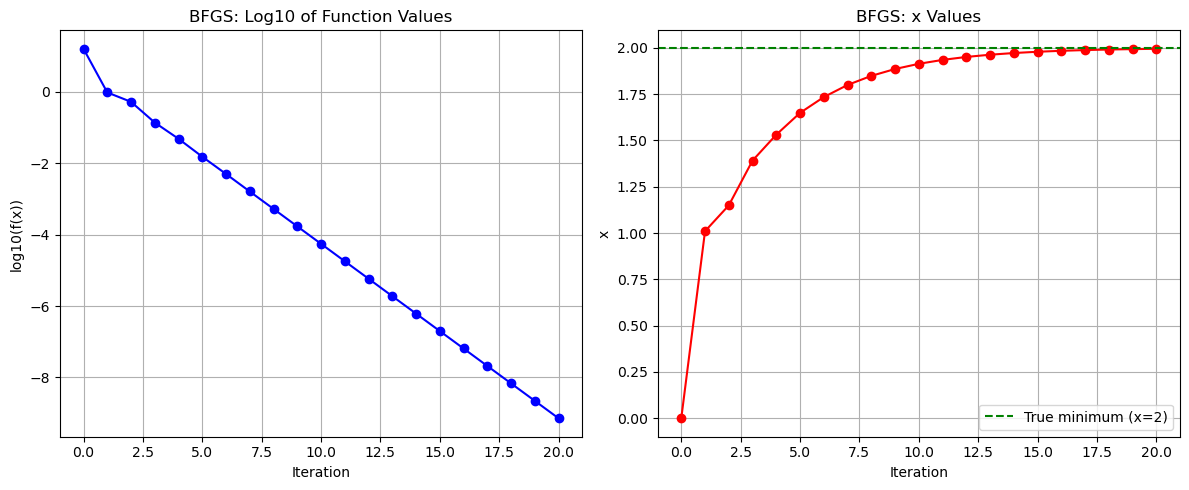

/usr/lib/python3/dist-packages/scipy/optimize/_minimize.py:703: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(fun, x0, args, jac, callback, **options)


         Current function value: 0.960596
         Iterations: 1
         Function evaluations: 31
         Gradient evaluations: 15
CG                    1           31    1.0100000000     9.90e-01 Failed    


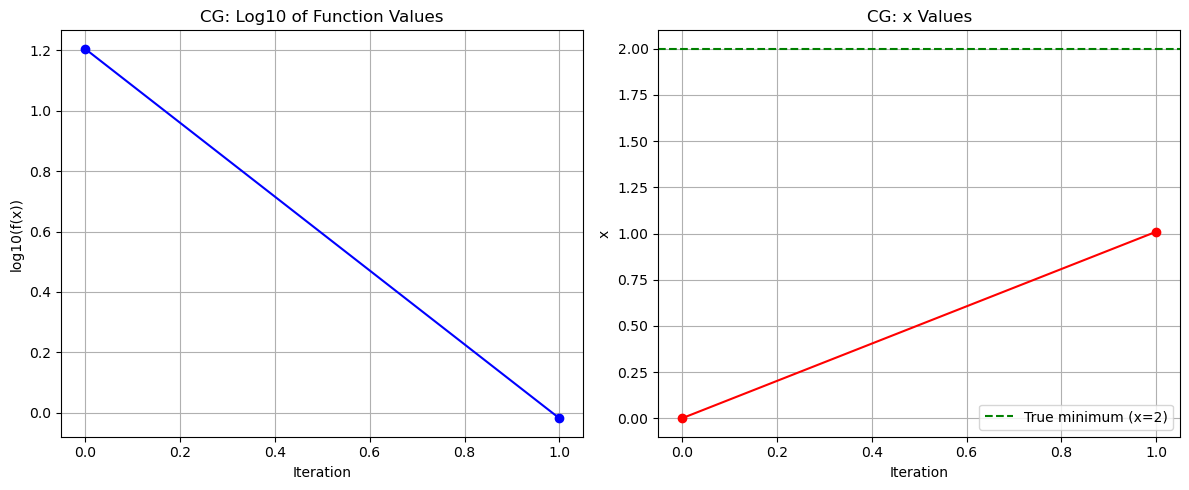

/tmp/ipykernel_14168/360727205.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_list.append(float(xk))
/tmp/ipykernel_14168/360727205.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f_list.append(float(function(xk)))


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 33
         Function evaluations: 66
Nelder-Mead          33           66    2.0000000000     2.22e-15 Success   


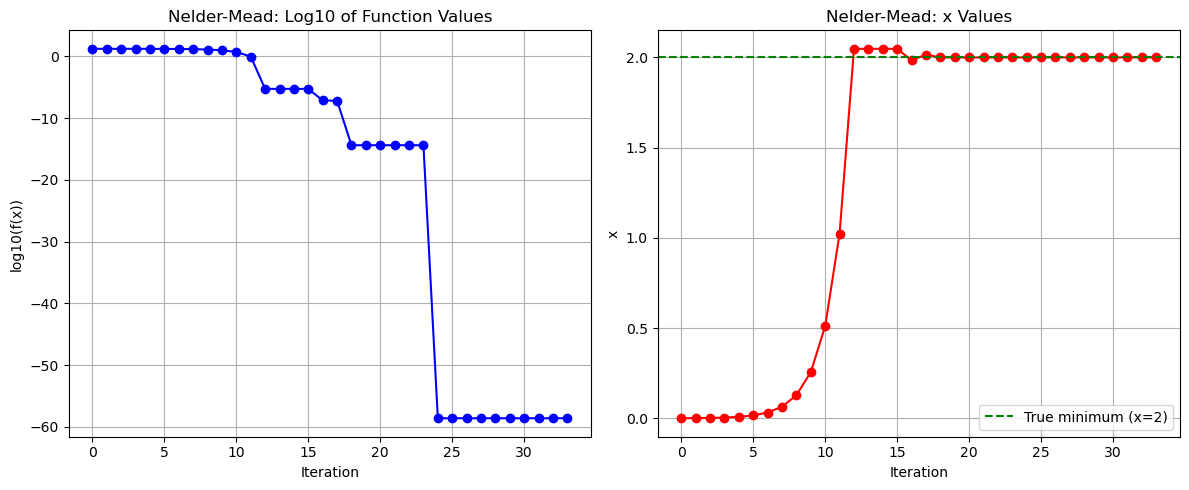

--------------------------------------------------------------------------------


In [17]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def minimize_function_x(x0, function, opt_method='CG', opt_options={'disp': True}, opt_tol=None, **kwargs):
    x_list = [float(x0)]
    f_list = [float(function(x0))]
    
    def callback(xk):
        x_list.append(float(xk))
        f_list.append(float(function(xk)))
    
    result = minimize(function, x0, method=opt_method, callback=callback,
                     options=opt_options, tol=opt_tol, **kwargs)
    
    return result, np.array(x_list), np.array(f_list)

def f1(x):
    return (x-2)**4

def f1_der(x):
    return 4*(x-2)**3

def plot_optimization(x_history, f_history, method_name):
    plt.figure(figsize=(12, 5))
    
    # Function values (log scale)
    plt.subplot(121)
    plt.plot(range(len(f_history)), np.log10(f_history), 'bo-')
    plt.grid(True)
    plt.title(f'{method_name}: Log10 of Function Values')
    plt.xlabel('Iteration')
    plt.ylabel('log10(f(x))')
    
    # x values
    plt.subplot(122)
    plt.plot(range(len(x_history)), x_history, 'ro-')
    plt.grid(True)
    plt.title(f'{method_name}: x Values')
    plt.xlabel('Iteration')
    plt.ylabel('x')
    plt.axhline(y=2, color='g', linestyle='--', label='True minimum (x=2)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Set initial conditions
x0 = 0
tolerance = 1e-6
true_minimum = 2.0

# Dictionary to store results
methods = {
    'Newton-CG': {'jac': f1_der},
    'BFGS': {},
    'CG': {},
    'Nelder-Mead': {}
}

# Print header
print("\nOptimization Methods Comparison:")
print("-" * 80)
print(f"{'Method':<12} {'Iterations':>10} {'Func Evals':>12} {'Result x':>15} {'Error x':>12} {'Comment':<10}")
print("-" * 80)

for method_name, kwargs in methods.items():
    # Run optimization
    result, x_history, f_history = minimize_function_x(
        x0, f1, 
        opt_method=method_name, 
        opt_tol=tolerance,
        **kwargs
    )
    
    # Calculate error
    error = abs(result.x[0] - true_minimum)
    
    # Print results
    print(f"{method_name:<12} {result.nit:>10d} {result.nfev:>12d} {result.x[0]:>15.10f} {error:>12.2e} {'Success' if result.success else 'Failed':<10}")
    
    # Plot optimization progress
    plot_optimization(x_history, f_history, method_name)

print("-" * 80)

### Newtonova metoda

Ena osnovnih iterativnih gradientnih metod deluje tako, da izračuna smer gradienta in v tej smeri poišče naslednjo točko z manjšo vrednostjo kriterijske funkcije.

$x_{k+1} = x_{k} - \frac{f'(x_k)}{f''(x_k)}$. 

Metoda potrebuje začetno točko (približek) in opcijsko podano gradientno funkcijo, če ta ni podana bo uporabila numerično izračunano oceno. 

### Metoda konjugiranega gradienta / Conjugate gradient descent
Metoda je gradientna metoda podobno kot Newtonova, vendar bolj natančno izračuna smer z ortogonalizacijo gradientnega vektorja, kar pomeni hitrejši spust in manj iteracij (hitrejšo konvergenco) za doseganje minimuma. 

> Conjugate gradient descent (CG) works in a similar fashion as Netwton's method, but tries to accelerate the convergence speed(i.e. how fast we find the solution). It achieves this by orthogonalizing the gradient vector - making it's descend steeper and thus faster. The orthogonalizing is based on the Grahm-Schmidt procedure. The function can work without the gradient (f_p) but will resort to a numerical estimate in such a case.

### Simpleksna metoda / Downhill simplex method

Metoda direktnega iskanja, ki ne potrebuje odvoda, saj primerja funkcijske vrednosti na robovih simpleksa in napreduje v smeri manjših vrednosti.  

> In the most simplified version - simplex algorithm works by trailing along the edges of feasible space (defined as a polytope) in the assumption that one of the vertices contains the desired extreme point (= lowest value). In a way it is similar to the graphical solution of the LP problem except that it works in a much more complex space. Another advantage is that it does not require the gradient function.

https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method

## Primer 2: Oddajniki / Transmitter characteristic

Imamo sistem štirih oddajnikov, razporejenih po x osi, s podano razdaljo med njimi. Karakteristiko enega oddajnika podaja enačba: 
> We have a system of four transmitters, with 10m between each. The transmitter characteristic (of each piece) on the x-axis is:

$amp*\frac{r^2}{(r^2+x^2)^{3/2}}$

> Assuming $amp=-1$ and $r=3$ for all four transmitters, we write down the transmission power along the x-axis. 
Our goal is to determine the point with the maximum transmitted power in the range between -10 and 50 meters.
To do this we first define the transmission functions and their gradients.

Zapišemo skupno funkcijo f(x) vsote moči oddajnikov na podani točki x. Naš cilj je ugotoviti točko v območju med -10 in 50 metri (x), kjer imamo maksimalno oddano moč. Definirali bomo še gradient funkcije, f_p(x). 

Power distribution across positions:


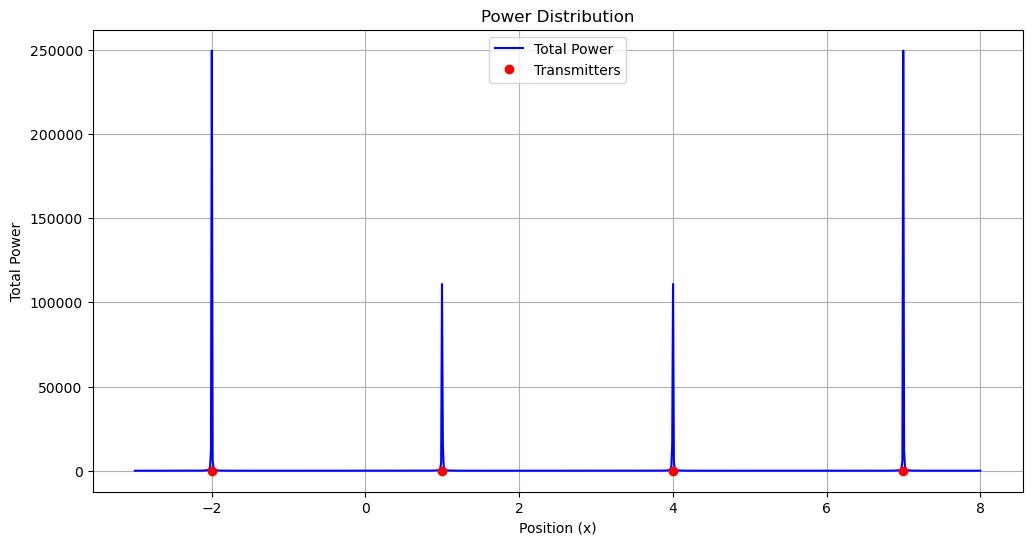


Optimization Results:
------------------------------------------------------------

CG method:
         Current function value: -1.305625
         Iterations: 0
         Function evaluations: 83
         Gradient evaluations: 39
         Current function value: -1.352500
         Iterations: 0
         Function evaluations: 83
         Gradient evaluations: 39
         Current function value: -1.332908
         Iterations: 0
         Function evaluations: 83
         Gradient evaluations: 39
         Current function value: -1.092908
         Iterations: 0
         Function evaluations: 91
         Gradient evaluations: 43


/usr/lib/python3/dist-packages/scipy/optimize/_minimize.py:703: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(fun, x0, args, jac, callback, **options)
/usr/lib/python3/dist-packages/scipy/optimize/_minimize.py:703: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(fun, x0, args, jac, callback, **options)
/usr/lib/python3/dist-packages/scipy/optimize/_minimize.py:703: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(fun, x0, args, jac, callback, **options)
/usr/lib/python3/dist-packages/scipy/optimize/_minimize.py:703: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(fun, x0, args, jac, callback, **options)


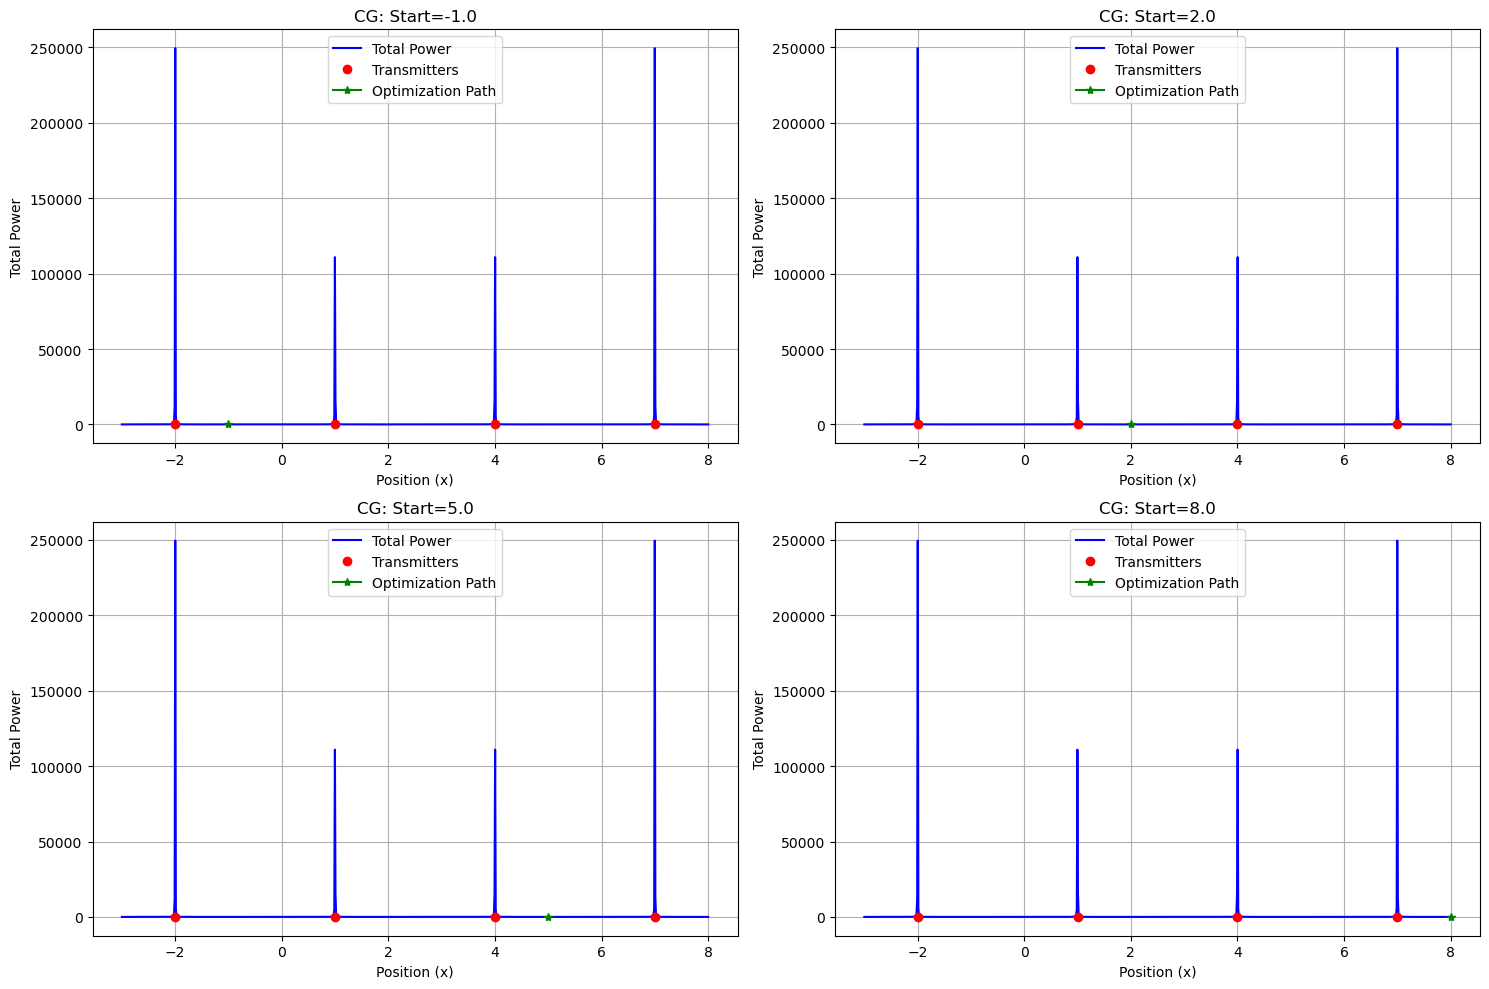

x0=-1.0: x=-1.0000 (Failed)
x0=2.0: x=2.0000 (Failed)
x0=5.0: x=5.0000 (Failed)
x0=8.0: x=8.0000 (Failed)

BFGS method:
         Current function value: -1.305625
         Iterations: 0
         Function evaluations: 83
         Gradient evaluations: 39
         Current function value: -1.352500
         Iterations: 0
         Function evaluations: 83
         Gradient evaluations: 39
         Current function value: -1.332908
         Iterations: 0
         Function evaluations: 83
         Gradient evaluations: 39
         Current function value: -1.092908
         Iterations: 0
         Function evaluations: 91
         Gradient evaluations: 43


/usr/lib/python3/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)
/usr/lib/python3/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)
/usr/lib/python3/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)
/usr/lib/python3/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


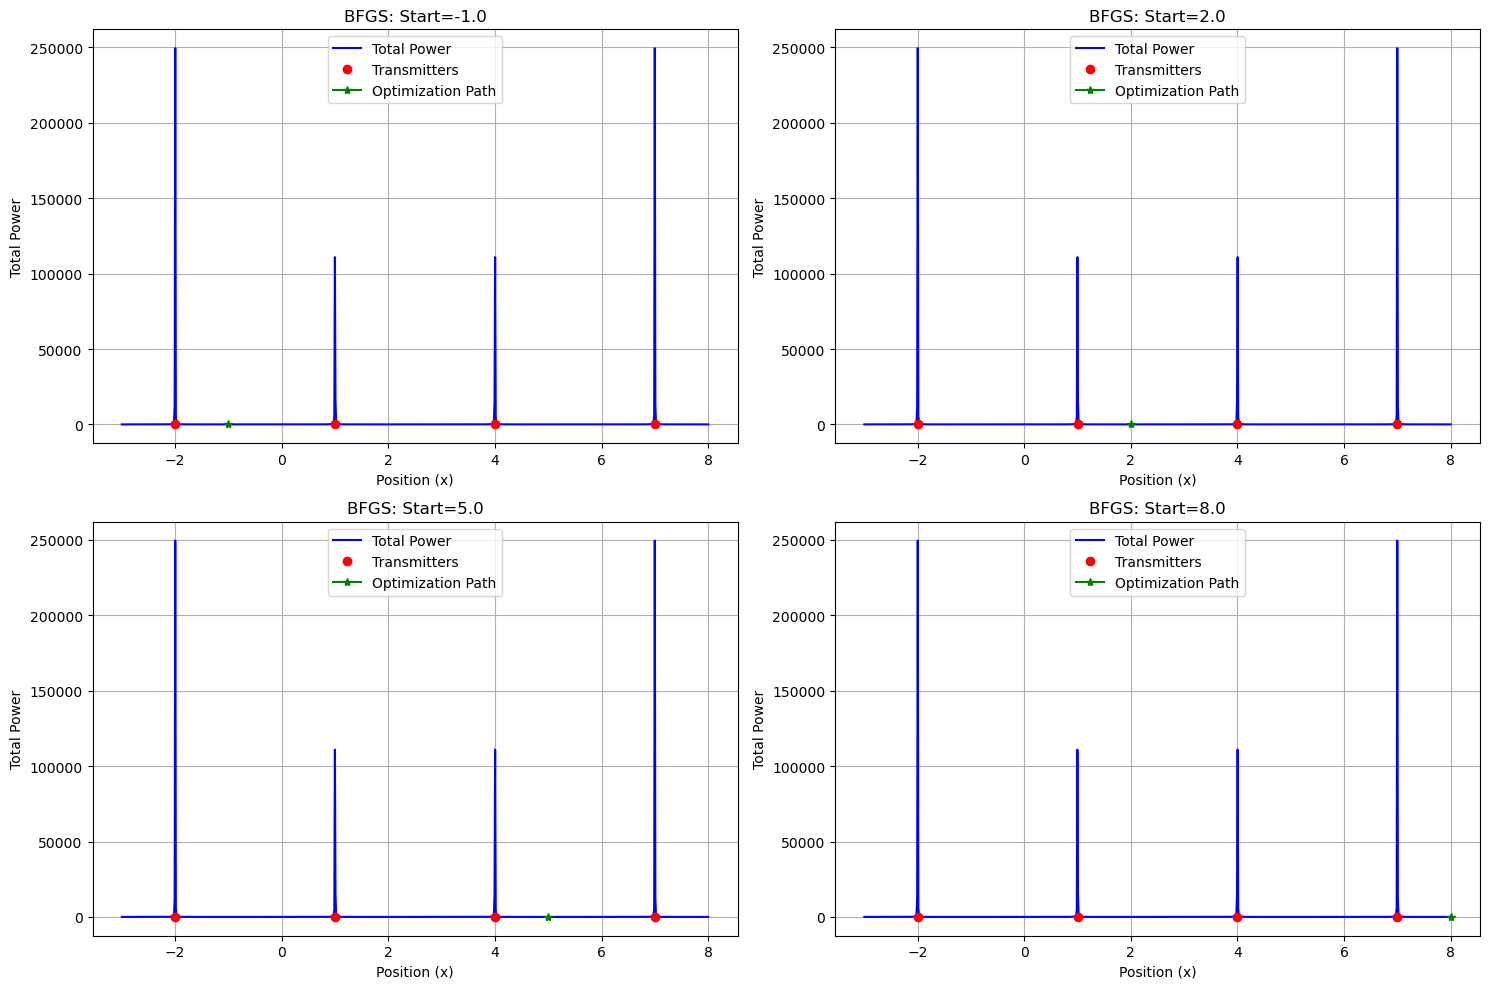

x0=-1.0: x=-1.0000 (Failed)
x0=2.0: x=2.0000 (Failed)
x0=5.0: x=5.0000 (Failed)
x0=8.0: x=8.0000 (Failed)

Nelder-Mead method:


/tmp/ipykernel_14168/360727205.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_list.append(float(xk))
/tmp/ipykernel_14168/2029163477.py:12: RuntimeWarning: divide by zero encountered in divide
  powers = tx_powers / (distances**2)
/usr/lib/python3/dist-packages/scipy/optimize/_optimize.py:917: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/tmp/ipykernel_14168/360727205.py:13: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(function, x0, method=opt_method, callback=callback,


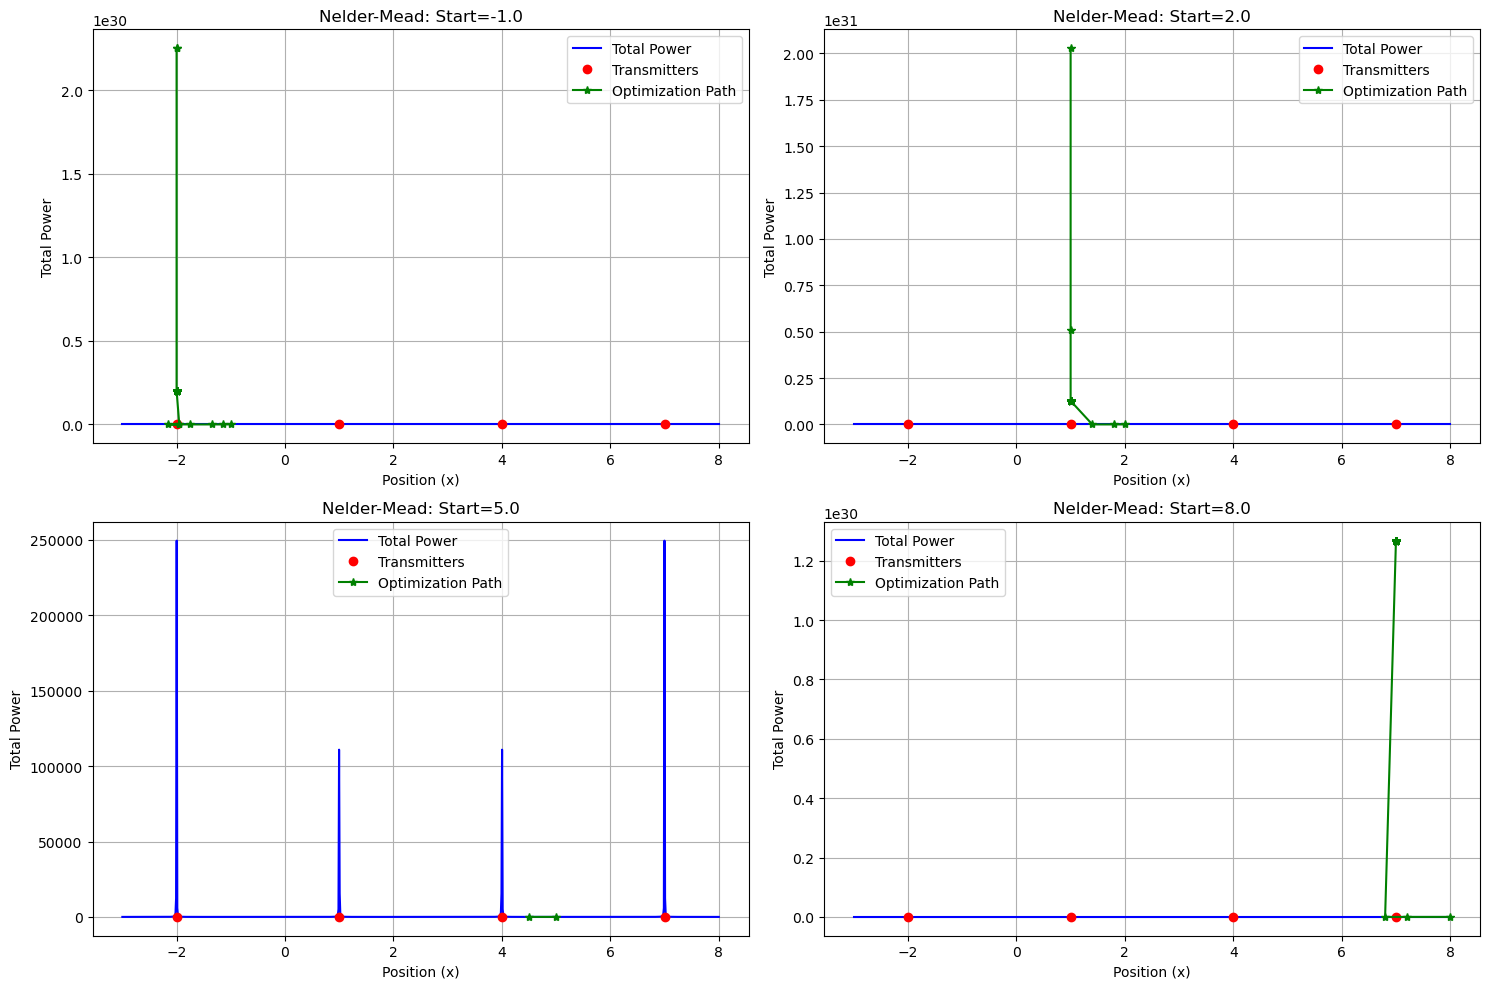

x0=-1.0: x=-2.0000 (Failed)
x0=2.0: x=1.0000 (Failed)
x0=5.0: x=4.0000 (Failed)
x0=8.0: x=7.0000 (Failed)

Powell method:
Optimization terminated successfully.
         Current function value: -inf
         Iterations: 3
         Function evaluations: 127
Optimization terminated successfully.
         Current function value: -inf
         Iterations: 3
         Function evaluations: 135
Optimization terminated successfully.
         Current function value: -inf
         Iterations: 3
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: -inf
         Iterations: 3
         Function evaluations: 136


/usr/lib/python3/dist-packages/scipy/optimize/_optimize.py:2490: RuntimeWarning: invalid value encountered in scalar subtract
  p = (x - v) * tmp2 - (x - w) * tmp1
/usr/lib/python3/dist-packages/scipy/optimize/_optimize.py:2491: RuntimeWarning: invalid value encountered in scalar subtract
  tmp2 = 2.0 * (tmp2 - tmp1)
/usr/lib/python3/dist-packages/scipy/optimize/_optimize.py:2489: RuntimeWarning: invalid value encountered in scalar subtract
  tmp2 = (x - v) * (fx - fw)
/usr/lib/python3/dist-packages/scipy/optimize/_optimize.py:2488: RuntimeWarning: invalid value encountered in scalar subtract
  tmp1 = (x - w) * (fx - fv)


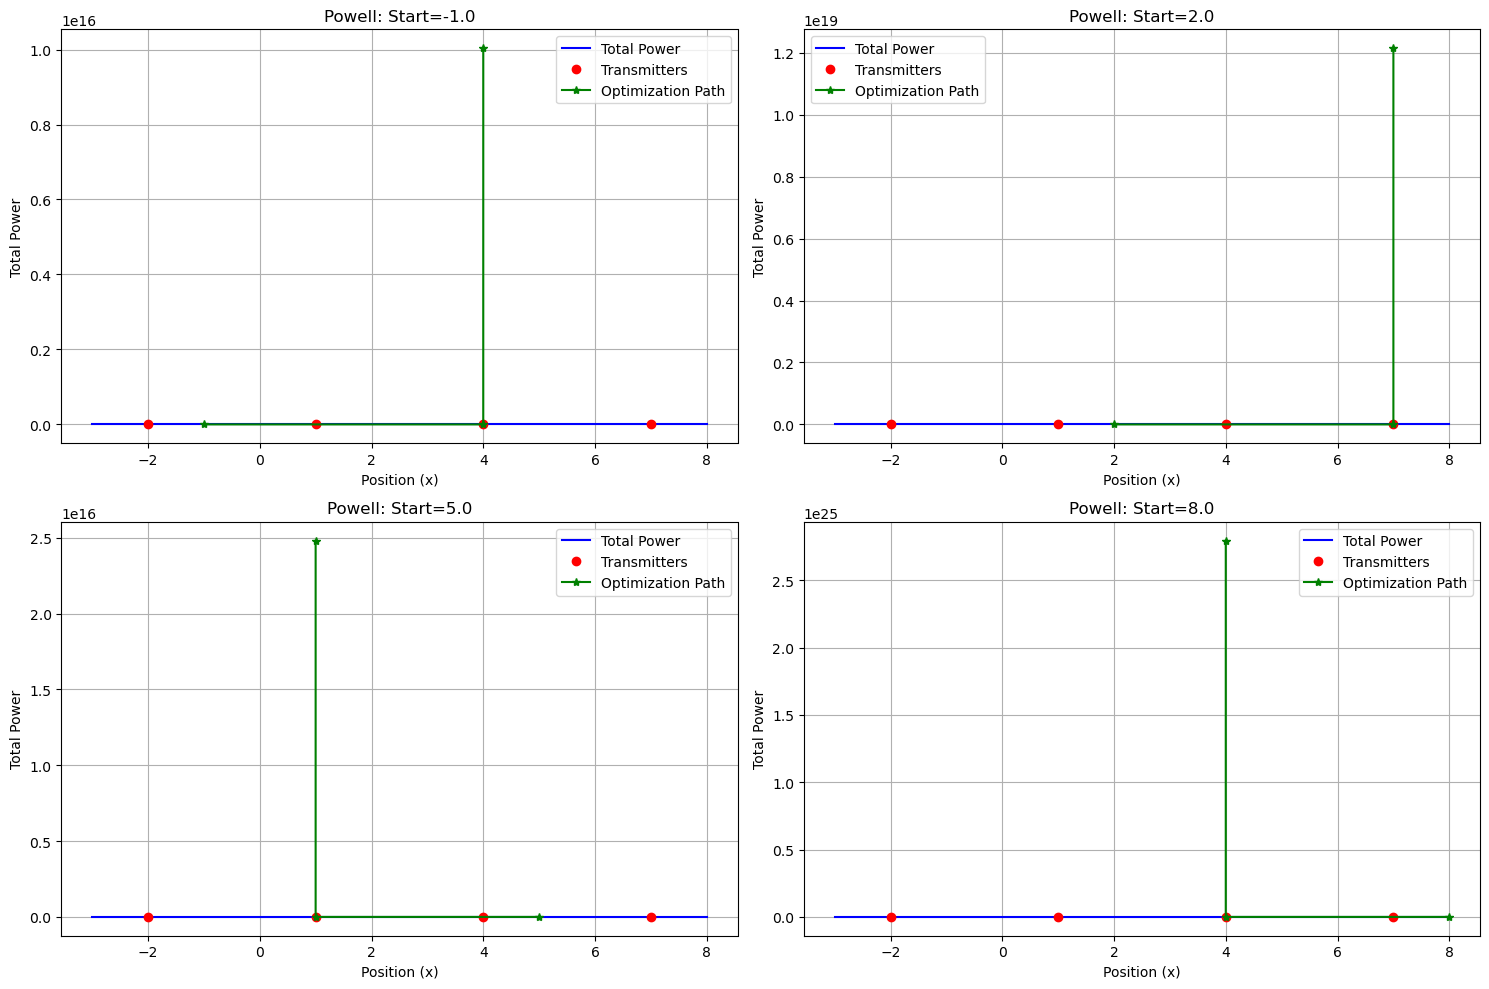

x0=-1.0: x=4.0000 (OK)
x0=2.0: x=7.0000 (OK)
x0=5.0: x=1.0000 (OK)
x0=8.0: x=4.0000 (OK)


In [18]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Transmitter positions
tx_positions = np.array([-2, 1, 4, 7])
tx_powers = np.array([1.0, 1.0, 1.0, 1.0])

def total_power(x):
    # Calculate total power at point x from all transmitters
    distances = np.abs(x - tx_positions)
    powers = tx_powers / (distances**2)
    return -np.sum(powers)  # Negative because we're minimizing

def plot_power_distribution():
    x = np.linspace(-3, 8, 1000)
    power = [-total_power(xi) for xi in x]
    
    plt.figure(figsize=(12, 6))
    plt.plot(x, power, 'b-', label='Total Power')
    plt.plot(tx_positions, np.zeros_like(tx_positions), 'ro', label='Transmitters')
    plt.grid(True)
    plt.title('Power Distribution')
    plt.xlabel('Position (x)')
    plt.ylabel('Total Power')
    plt.legend()
    plt.show()

def optimize_and_visualize(method, x_starts):
    results = []
    
    plt.figure(figsize=(15, 10))
    for i, x0 in enumerate(x_starts, 1):
        result, x_history, f_history = minimize_function_x(
            x0, total_power, 
            opt_method=method,
            opt_tol=1e-6
        )
        
        success = "OK" if result.success else "Failed"
        results.append(f"x0={x0:.1f}: x={result.x[0]:.4f} ({success})")
        
        # Plot optimization path
        plt.subplot(2, 2, i)
        x = np.linspace(-3, 8, 1000)
        power = [-total_power(xi) for xi in x]
        plt.plot(x, power, 'b-', label='Total Power')
        plt.plot(tx_positions, np.zeros_like(tx_positions), 'ro', label='Transmitters')
        plt.plot(x_history, [-total_power(x) for x in x_history], 'g*-', label='Optimization Path')
        plt.grid(True)
        plt.title(f'{method}: Start={x0}')
        plt.xlabel('Position (x)')
        plt.ylabel('Total Power')
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    return results

# Starting points
x_starts = [-1.0, 2.0, 5.0, 8.0]

# Plot power distribution
print("Power distribution across positions:")
plot_power_distribution()

# Test different methods
methods = ['CG', 'BFGS', 'Nelder-Mead', 'Powell']
print("\nOptimization Results:")
print("-" * 60)

for method in methods:
    print(f"\n{method} method:")
    results = optimize_and_visualize(method, x_starts)
    for result in results:
        print(result)

## 3. Optimizacija v dveh dimenzijah / Two dimensional problems

Metode delujejo tudi v več dimenzijah, vendar moramo podati funkcijo parcialnih odvodov. Primer Rosenbrockove funkcije.

> All of the presented methods also work in multiple dimensions. Unfortunatelly they also require some additional computation since the gradient function now becomes composed of partial gradients. We will demonstrate this on the Rosenbock function which is given as:  

$0.5(1-x)^2+(y-x^2)^2$

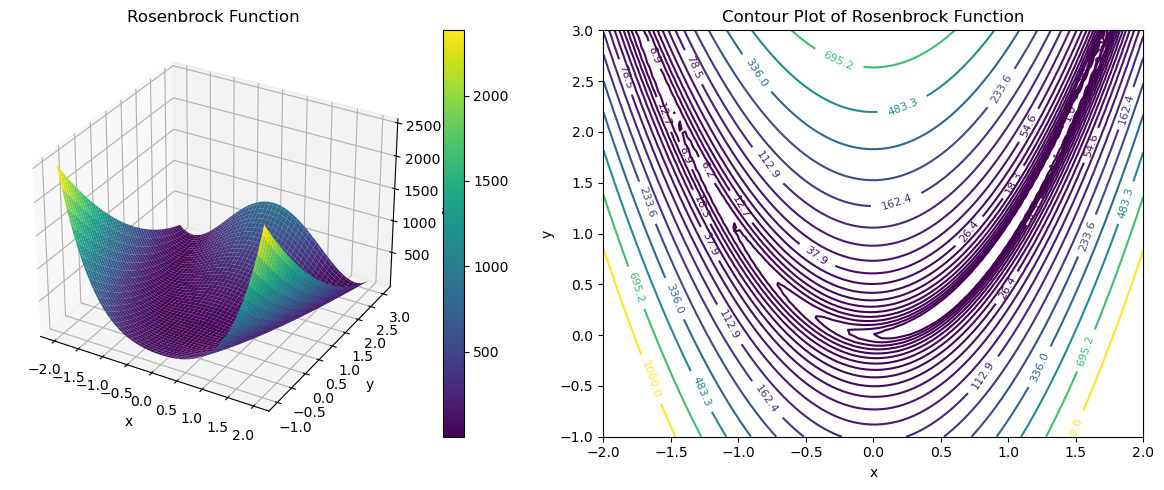

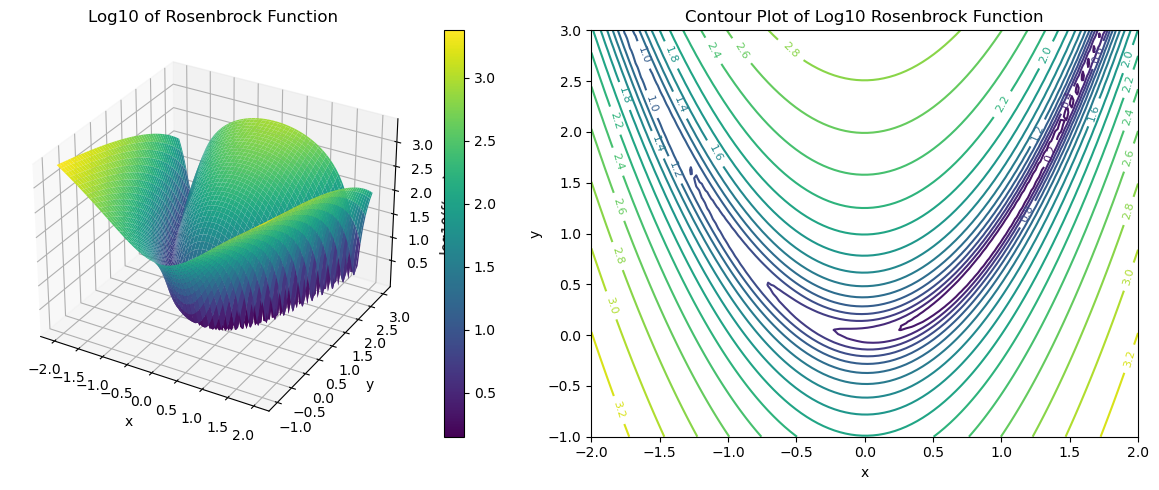

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def rosenbrock(x, y):
    """Rosenbrock function f(x,y) = (1-x)^2 + 100(y-x^2)^2"""
    return (1-x)**2 + 100*(y-x**2)**2

# Create grid of points
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

# Plot 1: Original Rosenbrock function
fig = plt.figure(figsize=(12, 5))

# Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap=cm.viridis,
                       linewidth=0, antialiased=True)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('Rosenbrock Function')
fig.colorbar(surf)

# Contour plot
ax2 = fig.add_subplot(122)
contours = ax2.contour(X, Y, Z, levels=np.logspace(0, 3, 20))
ax2.clabel(contours, inline=True, fontsize=8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour Plot of Rosenbrock Function')

plt.tight_layout()
plt.show()

# Plot 2: Logarithmic scale visualization
fig = plt.figure(figsize=(12, 5))

# Surface plot with log scale
ax1 = fig.add_subplot(121, projection='3d')
Z_log = np.log10(Z + 1)  # Add 1 to avoid log(0)
surf = ax1.plot_surface(X, Y, Z_log, cmap=cm.viridis,
                       linewidth=0, antialiased=True)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('log10(f(x,y) + 1)')
ax1.set_title('Log10 of Rosenbrock Function')
fig.colorbar(surf)

# Contour plot with log scale
ax2 = fig.add_subplot(122)
contours = ax2.contour(X, Y, Z_log, levels=20)
ax2.clabel(contours, inline=True, fontsize=8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour Plot of Log10 Rosenbrock Function')

plt.tight_layout()
plt.show()

Gradient-based Methods:
--------------------------------------------------------------------------------
Method       Iterations   Func Evals        Error Comment             
--------------------------------------------------------------------------------
Newton-CG           140          153     1.17e-05 Success, Good accuracy
BFGS                 35          141     1.07e-05 Success, Good accuracy
CG                   34          259     1.00e-05 Success, Good accuracy

Derivative-free Method:
--------------------------------------------------------------------------------
Method       Iterations   Func Evals        Error Comment             
--------------------------------------------------------------------------------
Nelder-Mead         105          195     1.95e-05 Success, Good accuracy


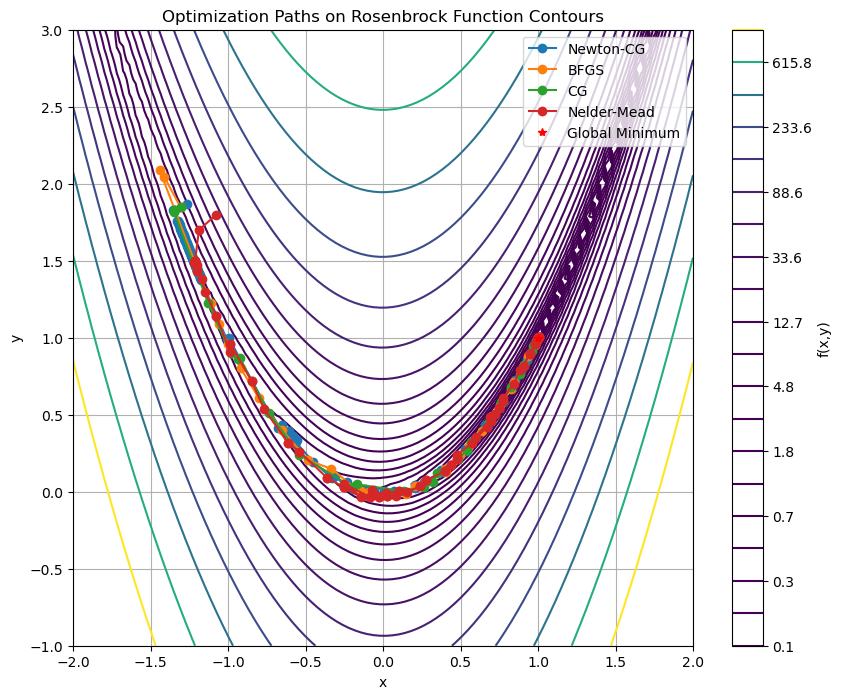

In [22]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def rosenbrock(x):
    """Rosenbrock function"""
    return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2

def rosenbrock_der(x):
    """Derivative of Rosenbrock function"""
    dx = -2*(1-x[0]) - 400*x[0]*(x[1]-x[0]**2)
    dy = 200*(x[1]-x[0]**2)
    return np.array([dx, dy])

# True minimum
x_true = np.array([1.0, 1.0])

def compute_error(x):
    """Compute Euclidean distance from true minimum"""
    return np.sqrt(np.sum((x - x_true)**2))

# Starting point
x0 = np.array([-1.0, 2.0])

# Test different methods
methods = {
    'Newton-CG': {'jac': rosenbrock_der},
    'BFGS': {},
    'CG': {}
}

print("Gradient-based Methods:")
print("-" * 80)
print(f"{'Method':<12} {'Iterations':>10} {'Func Evals':>12} {'Error':>12} {'Comment':<20}")
print("-" * 80)

for method_name, kwargs in methods.items():
    result = minimize(rosenbrock, x0, method=method_name, **kwargs)
    error = compute_error(result.x)
    
    comment = "Success" if result.success else "Failed"
    if error < 1e-5:
        comment += ", High accuracy"
    elif error < 1e-3:
        comment += ", Good accuracy"
    
    print(f"{method_name:<12} {result.nit:>10d} {result.nfev:>12d} {error:>12.2e} {comment:<20}")

print("\nDerivative-free Method:")
print("-" * 80)
print(f"{'Method':<12} {'Iterations':>10} {'Func Evals':>12} {'Error':>12} {'Comment':<20}")
print("-" * 80)

# Test Nelder-Mead
result = minimize(rosenbrock, x0, method='Nelder-Mead')
error = compute_error(result.x)
comment = "Success" if result.success else "Failed"
if error < 1e-5:
    comment += ", High accuracy"
elif error < 1e-3:
    comment += ", Good accuracy"

print(f"{'Nelder-Mead':<12} {result.nit:>10d} {result.nfev:>12d} {error:>12.2e} {comment:<20}")

# Visualization of convergence
def plot_optimization_path(method_name, kwargs={}):
    x_history = []
    
    def callback(xk):
        x_history.append(xk)
    
    result = minimize(rosenbrock, x0, method=method_name, callback=callback, **kwargs)
    x_history = np.array(x_history)
    
    plt.plot(x_history[:, 0], x_history[:, 1], 'o-', label=method_name)
    return result.success

# Create contour plot with optimization paths
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y])

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20))
plt.colorbar(label='f(x,y)')

# Plot optimization paths for each method
for method_name, kwargs in {**methods, 'Nelder-Mead': {}}.items():
    success = plot_optimization_path(method_name, kwargs)

plt.plot(1, 1, 'r*', label='Global Minimum')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Optimization Paths on Rosenbrock Function Contours')
plt.show()